# 🎵 Análise de Músicas do Spotify

## Configuração Inicial



Check these steps and adjust your code accordingly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Adicionar o diretório pai ao PATH do Python
import sys
sys.path.append(str(Path('.').resolve().parent))

# Importar funções específicas
from src.data_preprocessing import clean_spotify_data
from src.visualization import *
from src.data_analysis import *

# Configurações de visualização
plt.style.use('seaborn-v0_8')
sns.set_theme()
sns.set_palette('viridis')

## Carregamento e Visão Geral dos Dados

In [2]:
# Verificar e criar estrutura de diretórios
import os
from pathlib import Path
import sys

# Add project root to Python path
PROJECT_ROOT = Path('..').resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

# Now imports should work
from src.data_preprocessing import clean_spotify_data
from src.visualization import *
from src.data_analysis import *

# Verify imports
print("✅ Imports successful")
print(f"Project root: {PROJECT_ROOT}")

# Setup paths
PROJECT_ROOT = Path('..').resolve()
DATA_DIR = PROJECT_ROOT / 'data'
RAW_DIR = DATA_DIR / 'raw'
PROCESSED_DIR = DATA_DIR / 'processed'

# Ensure directories exist
RAW_DIR.mkdir(parents=True, exist_ok=True)
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)

# Define file paths com nome correto do arquivo
RAW_FILE = RAW_DIR / 'Spotify Most Streamed Songs.csv'  # Nome correto do arquivo
PROCESSED_FILE = PROCESSED_DIR / 'spotify_cleaned.csv'

# Verify raw data file exists
if not RAW_FILE.exists():
    print("⚠️ Arquivo de dados não encontrado!")
    print(f"Por favor, coloque o arquivo 'Spotify Most Streamed Songs.csv' em:")
    print(f"{RAW_FILE}")
    raise FileNotFoundError(f"Arquivo não encontrado: {RAW_FILE}")

# Process or load data
try:
    print("📊 Processando dados...")
    # Force reprocessing by deleting existing processed file
    if PROCESSED_FILE.exists():
        PROCESSED_FILE.unlink()
    
    df_raw = pd.read_csv(RAW_FILE)
    df = clean_spotify_data(df_raw)
    df.to_csv(PROCESSED_FILE, index=False)
    print("✅ Dados processados e salvos!")
    
    # Verificar se a coluna existe
    if 'released_date' not in df.columns:
        raise KeyError("Coluna 'released_date' não encontrada após pré-processamento!")
        
    # Convert date column
    df['released_date'] = pd.to_datetime(df['released_date'])
    
    print("\n📊 Informações do Dataset:")
    print(f"Dimensões: {df.shape}")
    df.info()
    
except Exception as e:
    
    print(f"❌ Erro ao processar dados: {str(e)}")
    raise

✅ Imports successful
Project root: C:\Users\tiago\OneDrive\Área de Trabalho\meus cursos\data-analyst-project
📊 Processando dados...
✅ Dados processados e salvos!

📊 Informações do Dataset:
Dimensões: (953, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            953 non-null    object        
 1   artist(s)_name        953 non-null    object        
 2   artist_count          953 non-null    int64         
 3   released_year         953 non-null    int64         
 4   released_month        953 non-null    int64         
 5   released_day          953 non-null    int64         
 6   in_spotify_playlists  953 non-null    int64         
 7   in_spotify_charts     953 non-null    int64         
 8   streams               952 non-null    float64       
 9   in_apple_playlists    953 non-null    int6

## 1. Validação dos Dados Processados

In [3]:
df = pd.read_csv(r'C:\Users\tiago\OneDrive\Área de Trabalho\meus cursos\data-analyst-project\data\processed\spotify_cleaned.csv')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url,released_date,ano,mes
0,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,38,80,0,0,9,7,https://i.scdn.co/image/ab67616d0000b2738863bc...,2019-11-29,2019,11
1,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,93,65,58,0,9,8,https://i.scdn.co/image/ab67616d0000b273ba5db4...,2017-01-06,2017,1
2,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,45,41,75,0,11,3,https://i.scdn.co/image/ab67616d0000b273fc2101...,2018-11-08,2018,11
3,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,54,59,69,0,18,10,https://i.scdn.co/image/ab67616d0000b273c6f7af...,2019-05-10,2019,5
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,91,50,54,0,7,5,https://i.scdn.co/image/ab67616d0000b273e2e352...,2018-10-09,2018,10


In [4]:
# Verificar estrutura dos dados
print("\n📊 Colunas do Dataset:")
print(df.columns.tolist())

print("\n📊 Tipos de Dados:")
print(df.dtypes)

print("\n📊 Valores Ausentes:")
print(df.isnull().sum())

print("\n📊 Primeiras Linhas:")
display(df.head())


📊 Colunas do Dataset:
['track_name', 'artist(s)_name', 'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'cover_url', 'released_date', 'ano', 'mes']

📊 Tipos de Dados:
track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists      object
in_deezer_charts          int64
in_shazam_charts          int64
bpm                       int64
key                      object
mode  

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url,released_date,ano,mes
0,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,38,80,0,0,9,7,https://i.scdn.co/image/ab67616d0000b2738863bc...,2019-11-29,2019,11
1,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,93,65,58,0,9,8,https://i.scdn.co/image/ab67616d0000b273ba5db4...,2017-01-06,2017,1
2,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,45,41,75,0,11,3,https://i.scdn.co/image/ab67616d0000b273fc2101...,2018-11-08,2018,11
3,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,54,59,69,0,18,10,https://i.scdn.co/image/ab67616d0000b273c6f7af...,2019-05-10,2019,5
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,91,50,54,0,7,5,https://i.scdn.co/image/ab67616d0000b273e2e352...,2018-10-09,2018,10


## 2. Análise Exploratória Básica

In [5]:
# Estatísticas descritivas
print("\n📊 Estatísticas Básicas:")
display(df.describe())

# Convert 'released_date' to datetime
df['released_date'] = pd.to_datetime(df['released_date'])

# Análise temporal
df['ano'] = df['released_date'].dt.year
df['mes'] = df['released_date'].dt.month

print("\n📊 Distribuição por Ano:")
display(df['ano'].value_counts().sort_index())

print("\n📊 Top 10 Artistas:")
display(df['artist(s)_name'].value_counts().head(10))


📊 Estatísticas Básicas:


,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,...,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,ano,mes
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.520000e+02,953.000000,953.000000,953.000000,...,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.141374e+08,67.812172,51.908709,2.666317,...,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165,2018.238195,6.033578
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.668569e+08,86.441493,50.630241,6.035599,...,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888,11.116218,3.566435
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,...,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000,1930.000000,1.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.416362e+08,13.000000,7.000000,0.000000,...,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000,2020.000000,3.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.905309e+08,34.000000,38.000000,0.000000,...,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000,2022.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738690e+08,88.000000,87.000000,2.000000,...,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000,2022.000000,9.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,...,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,2023.000000,12.000000



📊 Distribuição por Ano:


ano
1930      1
1942      1
1946      1
1950      1
1952      1
1957      2
1958      3
1959      2
1963      3
1968      1
1970      2
1971      1
1973      1
1975      2
1979      1
1982      2
1983      1
1984      4
1985      2
1986      2
1987      1
1991      2
1992      1
1994      1
1995      2
1996      1
1997      1
1998      1
1999      5
2000      4
2002      6
2003      2
2004      4
2005      1
2007      1
2008      2
2010      7
2011     10
2012     10
2013     13
2014     13
2015     11
2016     18
2017     23
2018     10
2019     36
2020     37
2021    119
2022    402
2023    175
Name: count, dtype: int64


📊 Top 10 Artistas:


artist(s)_name
Taylor Swift        34
The Weeknd          22
Bad Bunny           19
SZA                 19
Harry Styles        17
Kendrick Lamar      12
Morgan Wallen       11
Ed Sheeran           9
Feid                 8
Drake, 21 Savage     8
Name: count, dtype: int64

## 3. Visualizações Estratégicas

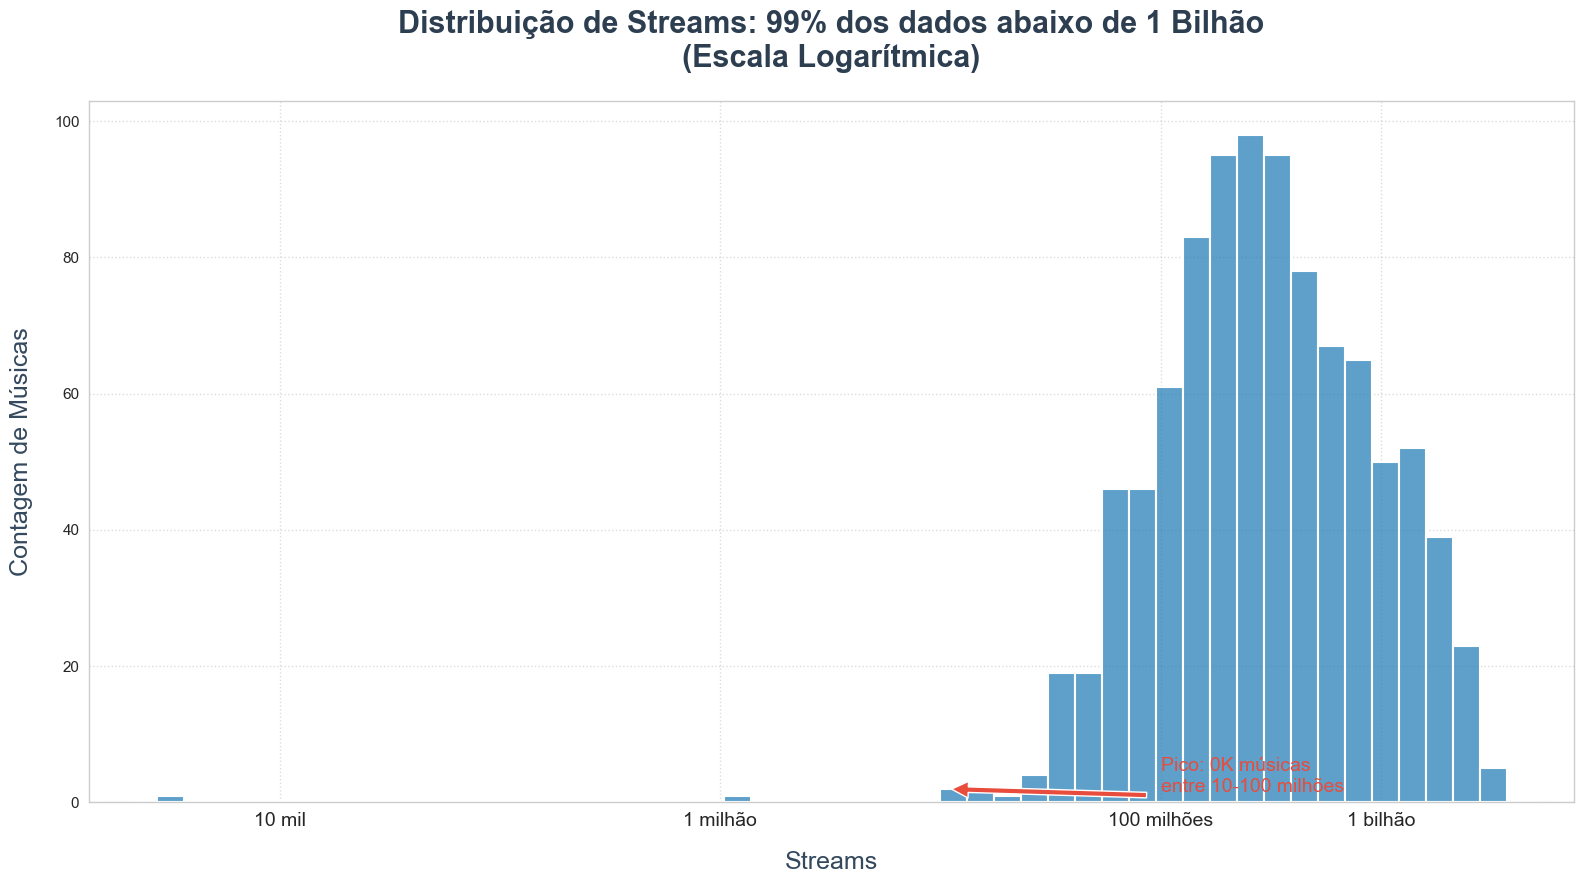

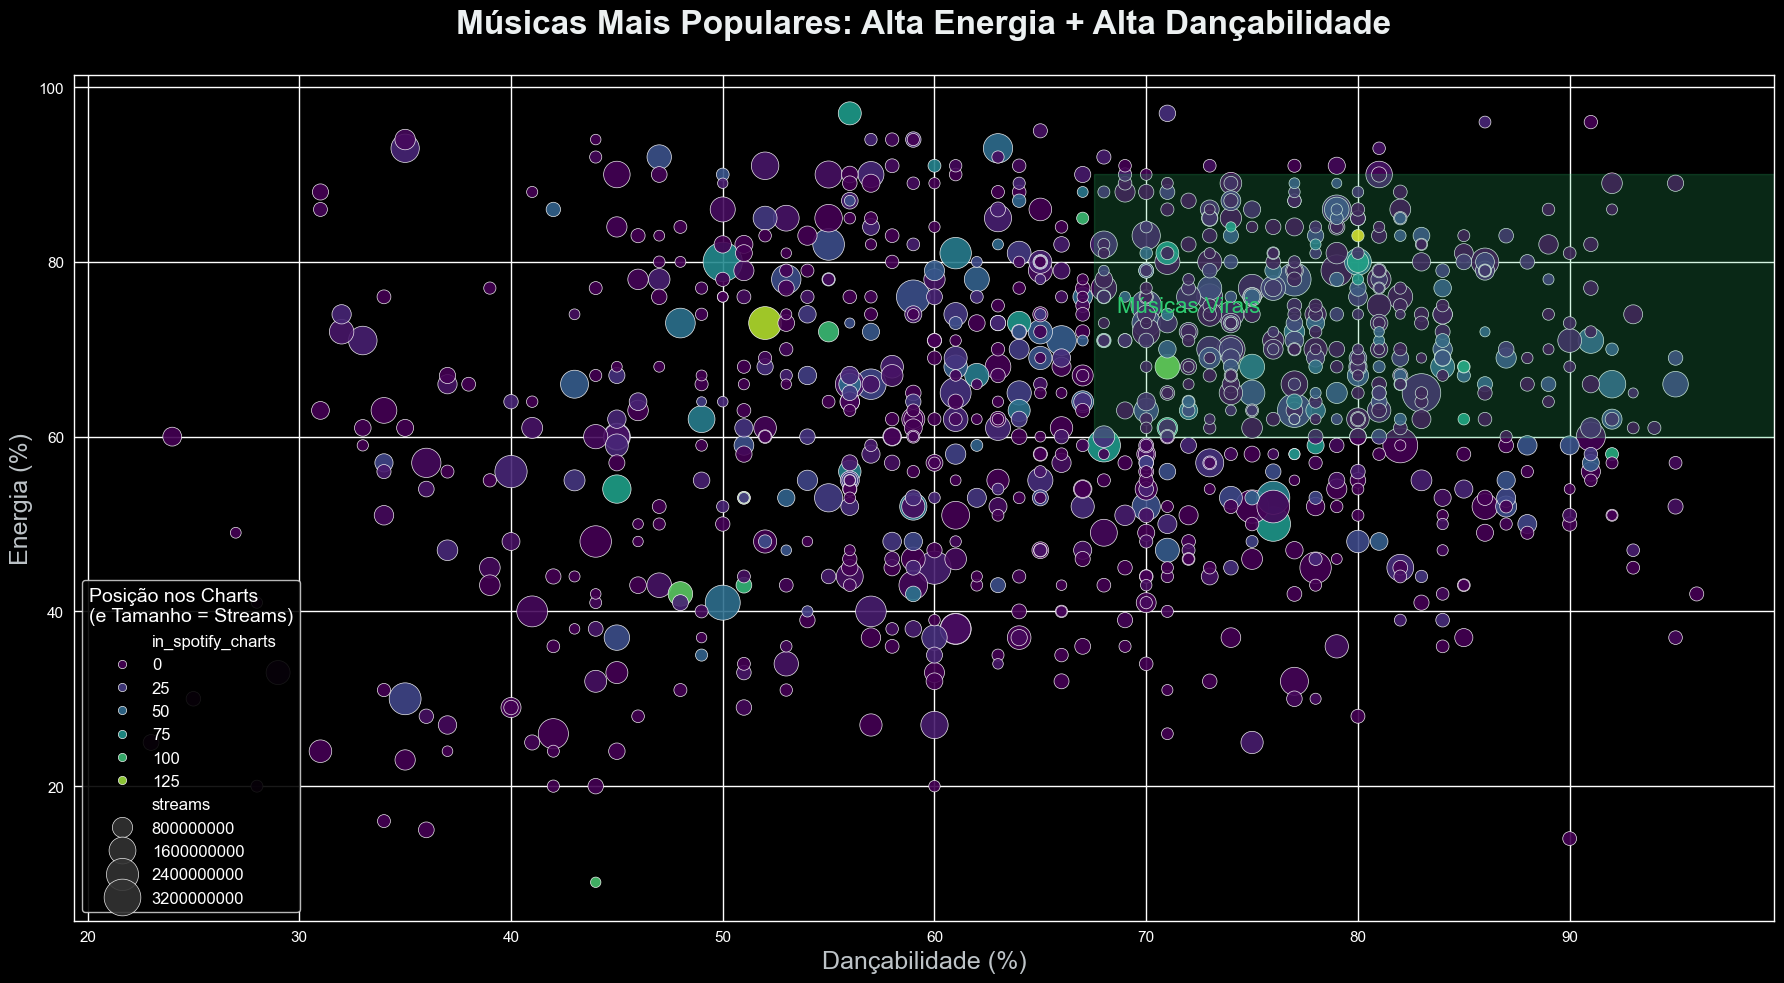

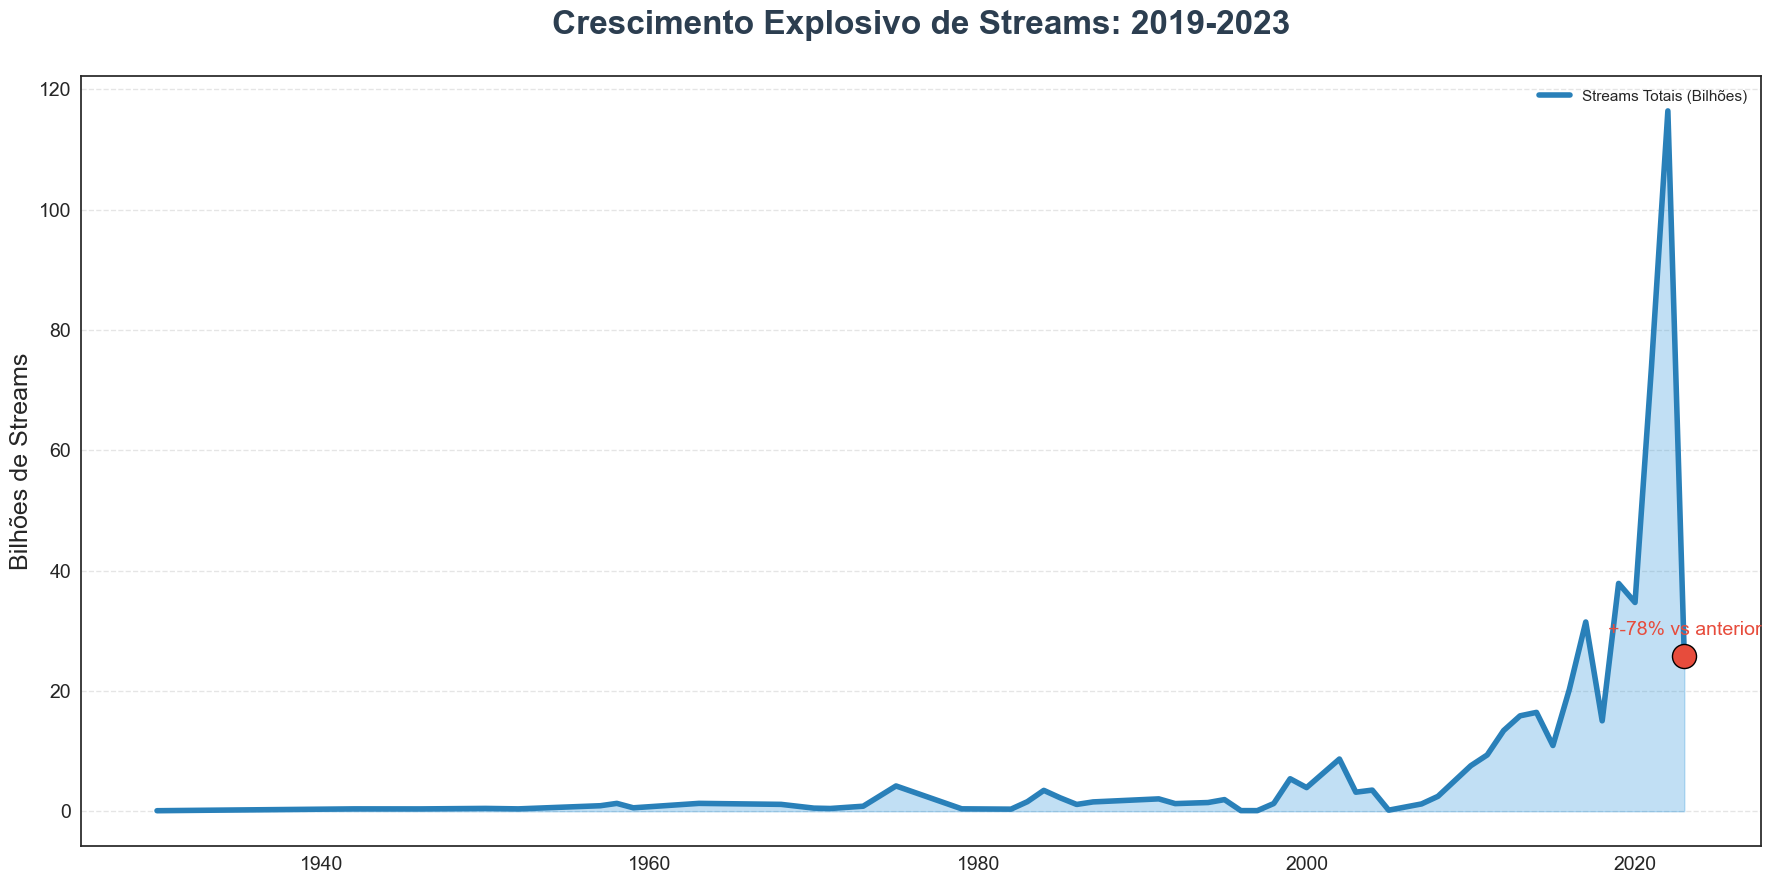

C:\Users\tiago\OneDrive\Área de Trabalho\meus cursos\data-analyst-project\src\visualization.py:237: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x='month_name', y='count', data=df_month, palette='plasma', edgecolor='black')


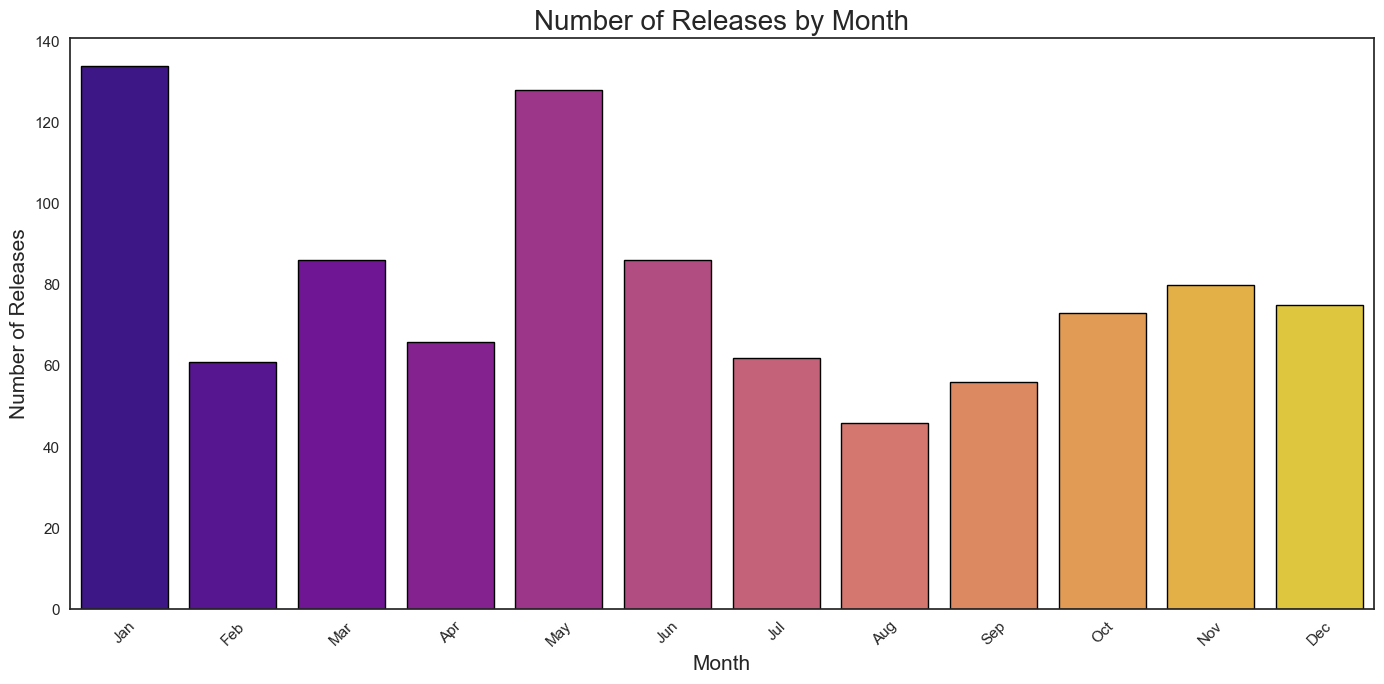

In [6]:
plot_streams_distribution(df)
plot_danceability_vs_energy(df)
plot_streams_by_year(df)
plot_releases_by_month(df)